In [27]:
import requests
import pandas as pd
import numpy as np
from env import get_db_url
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from pydataset import data
from env import get_db_url
import pandas as pd
import numpy as np
import acquire as a
import seaborn as sns
import matplotlib.pyplot as plt

## Using your store items data:

In [2]:
#conn = get_db_url('tsa_item_demand')

#query = '''
           #SELECT *
           # FROM items
           # JOIN sales ON items.item_id = sales.item_id
           # JOIN stores ON sales.store_id = stores.store_id;
           # '''

 

In [3]:
# df = pd.read_sql(query, conn)

In [4]:
#df

In [5]:
#df.to_csv('tsa_item_data.csv', index=False)

In [6]:
 df = pd.read_csv('tsa_item_data.csv')

In [7]:
df

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,store_id,item_id.1,sale_amount,store_id.1,store_address,store_zipcode,store_city,store_state
0,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,1,1,13,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,1,1,11,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,1,1,14,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,1,1,13,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,1,1,10,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - 16 Ct,5.20,912996,2017-12-27,10,50,63,10,8503 NW Military Hwy,78231,San Antonio,TX
912996,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - 16 Ct,5.20,912997,2017-12-28,10,50,59,10,8503 NW Military Hwy,78231,San Antonio,TX
912997,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - 16 Ct,5.20,912998,2017-12-29,10,50,74,10,8503 NW Military Hwy,78231,San Antonio,TX
912998,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - 16 Ct,5.20,912999,2017-12-30,10,50,62,10,8503 NW Military Hwy,78231,San Antonio,TX


## Convert date column to datetime format.

In [8]:
df.columns

Index(['item_id', 'item_upc14', 'item_upc12', 'item_brand', 'item_name',
       'item_price', 'sale_id', 'sale_date', 'store_id', 'item_id.1',
       'sale_amount', 'store_id.1', 'store_address', 'store_zipcode',
       'store_city', 'store_state'],
      dtype='object')

In [9]:
df.sale_date = pd.to_datetime(df.sale_date)

## Plot the distribution of sale_amount and item_price.

<Axes: xlabel='item_price'>

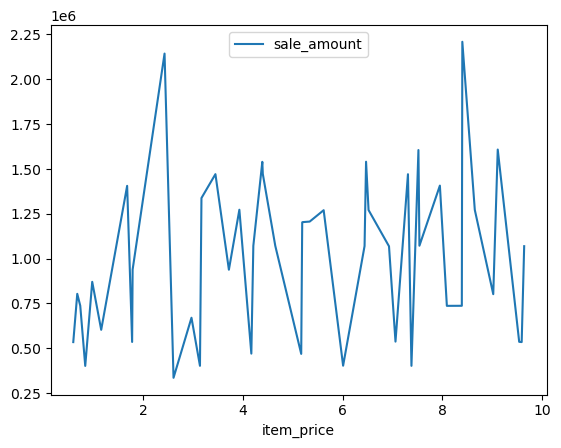

In [10]:
by_date = df.groupby(['item_price']).sale_amount.sum().reset_index()
by_date.plot(x='item_price', y='sale_amount')


## Set the index to be the datetime variable.

In [11]:
df = df.set_index("sale_date").sort_index()

In [12]:
df

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,store_id,item_id.1,sale_amount,store_id.1,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,1,1,13,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,3,17,26,3,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,10,7,32,10,8503 NW Military Hwy,78231,San Antonio,TX
2013-01-01,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,3,18,45,3,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,3,19,34,3,2118 Fredericksburg Rdj,78201,San Antonio,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On Golden Toast Crackers - 8 Pk,9.02,706662,7,39,31,7,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,7,40,22,7,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With Broccoli,5.62,743182,7,41,19,7,12018 Perrin Beitel Rd,78217,San Antonio,TX


## Add a 'month' and 'day of week' column to your dataframe.

In [13]:
df['month'] = df.index.month

df['day_of_week'] = df.index.dayofweek

In [14]:
df.head()

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,store_id,item_id.1,sale_amount,store_id.1,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,1,1,13,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,3,17,26,3,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1
2013-01-01,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,10,7,32,10,8503 NW Military Hwy,78231,San Antonio,TX,1,1
2013-01-01,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,3,18,45,3,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1
2013-01-01,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,3,19,34,3,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1


## Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [15]:
df = df.assign(sales_total=df['sale_amount'] * df['item_price'])

In [16]:
df

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,store_id,item_id.1,sale_amount,store_id.1,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,1,1,13,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1,10.92
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,3,17,26,3,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1,30.16
2013-01-01,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,10,7,32,10,8503 NW Military Hwy,78231,San Antonio,TX,1,1,308.48
2013-01-01,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,3,18,45,3,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1,197.55
2013-01-01,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,3,19,34,3,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On Golden Toast Crackers - 8 Pk,9.02,706662,7,39,31,7,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,6,279.62
2017-12-31,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,7,40,22,7,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,6,13.20
2017-12-31,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With Broccoli,5.62,743182,7,41,19,7,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,6,106.78


## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [17]:
def new_tsa_data():
    conn = get_db_url('tsa_item_demand')

    query = '''
           #SELECT *
           # FROM items
           # JOIN sales ON items.item_id = sales.item_id
           # JOIN stores ON sales.store_id = stores.store_id;
           # '''


    
    df = pd.read_sql(query, conn)
    return df
    
    
def get_tsa_data():
   

    if os.path.isfile('tsa_item_data.csv'):
        df = pd.read_csv('tsa_item_data.csv', index_col = 0)
        

    else:

        df = get_tsa_data()
        df.to_csv('tsa_item_data.csv')
        
    return df

def prep_tsa_data(df):
    
    df.sale_date = pd.to_datetime(df.sale_date)
    df = df.set_index("sale_date").sort_index()
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df = df.assign(sales_total=df['sale_amount'] * df['item_price'])
    
    return df

def wrangle_tsa():
  
    df = get_tsa_data()
    df = prep_tsa_data(df)
    return df

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [18]:
df = a.new_wine_data()

In [19]:
df

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


## Convert date column to datetime format.

In [22]:
df.index = pd.to_datetime(df.index)

## Plot the distribution of each of your variables.

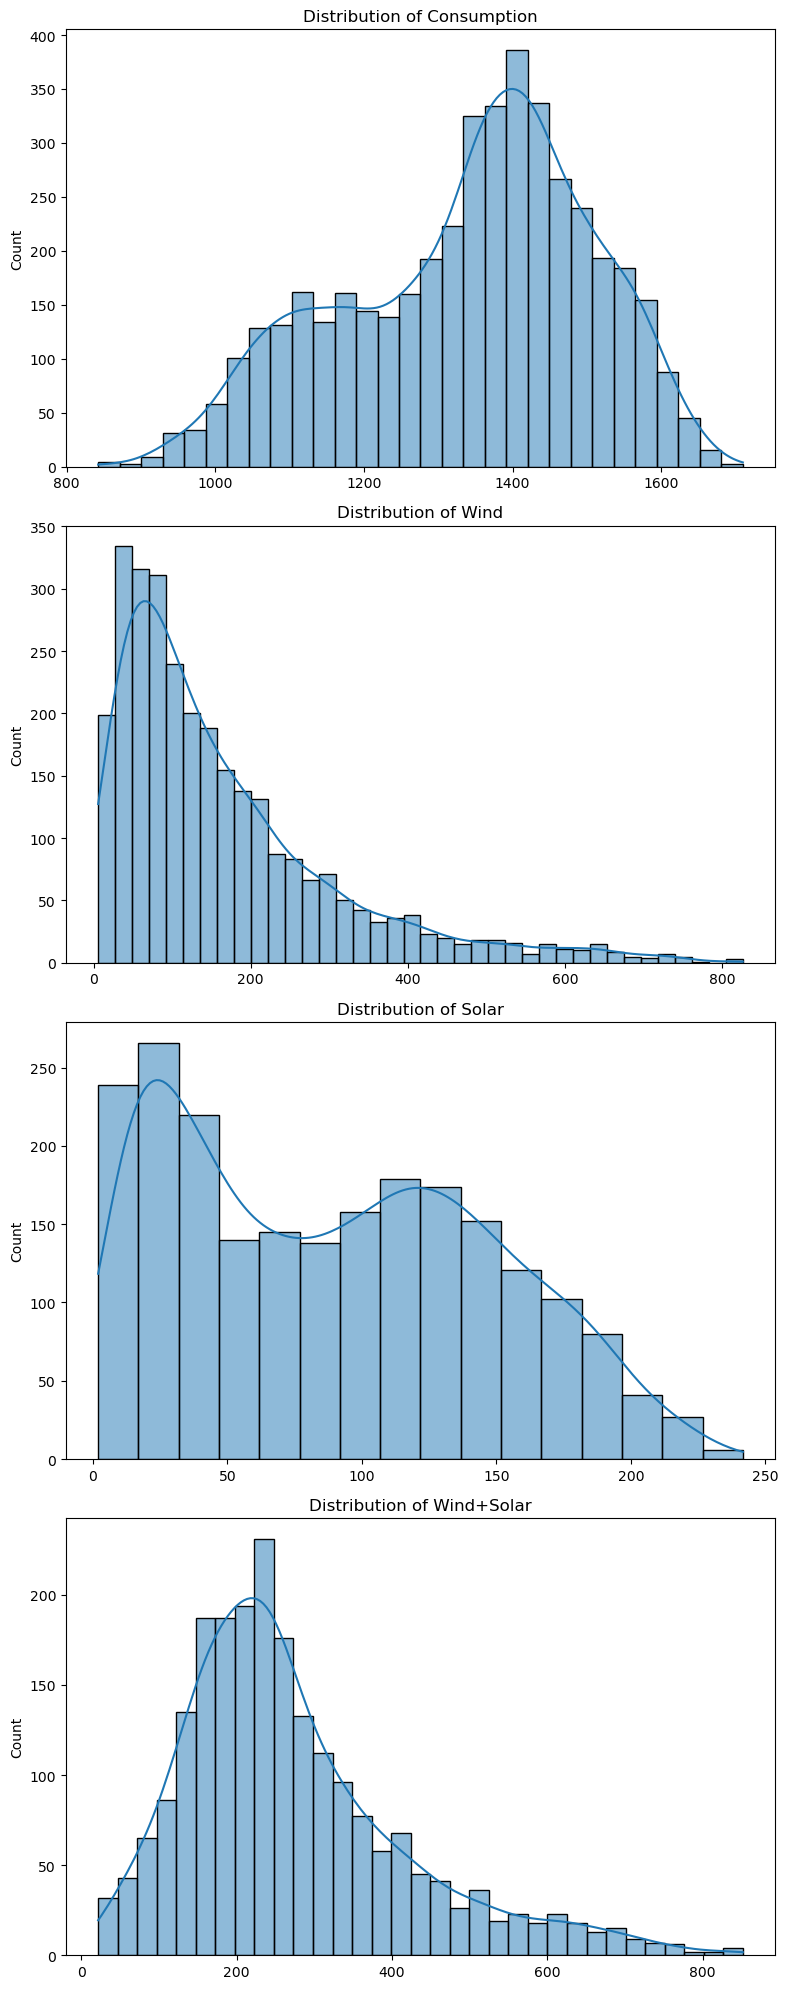

In [28]:
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(8, 5 * len(df.columns)))
for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

## Set the index to be the datetime variable.

In [31]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

## Add a month and a year column to your dataframe.

In [32]:
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek

In [33]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,day_of_week
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,6
2006-01-02,1380.521,NaN,NaN,NaN,1,0
2006-01-03,1442.533,NaN,NaN,NaN,1,1
2006-01-04,1457.217,NaN,NaN,NaN,1,2
2006-01-05,1477.131,NaN,NaN,NaN,1,3


## Fill any missing values.

In [36]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')


In [37]:
df

,Consumption,Wind,Solar,Wind+Solar,month,day_of_week
Date,,,,,,
2006-01-01,1069.18400,48.709,6.587,234.052,1,6
2006-01-02,1380.52100,48.709,6.587,234.052,1,0
2006-01-03,1442.53300,48.709,6.587,234.052,1,1
2006-01-04,1457.21700,48.709,6.587,234.052,1,2
2006-01-05,1477.13100,48.709,6.587,234.052,1,3
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,12,4


## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def new_wine_data():
    if os.path.isfile('wine.csv'):
            df = pd.read_csv('wine.csv', index_col = 0)
            
    
    else:
    
            df = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
            df.to_csv('wine.csv')
            
    return df
    


def prep_wine_data(df):
    
    df.index = pd.to_datetime(df.index)
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')
    
    return df

def wrangle_wine():
  
    df = new_wine_data()
    df = prep_wine_data(df)
    return df